In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

answer=
[3.4482758620689653, 3.1595576619273302, 3.1352876626430475, 3.146138115463269]



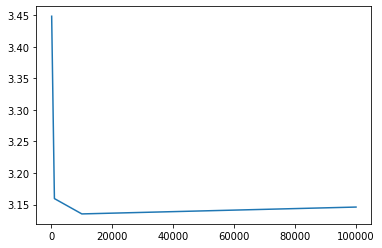

In [12]:
#1.needle trial
# assume that a = 1, l = 1
answer1=[]
for n in [100,1000,10000,100000]:
    count=0
    X1=1/2*np.random.random_sample(n) 
    Y1=np.pi/2*np.random.random_sample(n)
    for x,y in zip(X1,Y1):
            if x/np.sin(y)<1/2:
                count=count+1
    answer1.append(2*n/count)
print("answer=\n{}\n".format(answer1))
plt.plot([100,1000,10000,100000],answer1)
# calculated answer is 3.1415926(pai)

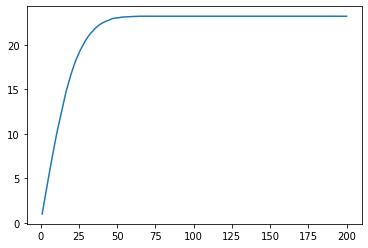

In [134]:
#2.birthday
count_bir=0
n_time=200
n_stud=np.arange(1,201,1)
count_a=np.linspace(1,200,200)
for j in n_stud:
    for i in range(n_time):
        n_days=365
        X_1=np.random.randint(0,366,j)
        x_1=pd.DataFrame(X_1,columns=['outcome'])
        x_2=x_1['outcome'].value_counts()
        aa = np.shape(x_2)
        if (aa[0]==j):
            count_bir=count_bir+1
    count_a[j-1]=count_bir/n_time
plt.plot(n_stud,count_a)

In [13]:
#3.kings problem
import math
N=90000
j1=0
for n in range(N):
    cards3=np.zeros((52,1),dtype=int)
    j=0
    for i in range(52):
        cards3[i]=i
    np.random.shuffle(cards3)
   # print('{}',format(cards3))
    cards3=cards3[:7]
    for i in cards3:
    #assume that 3 kings are labeled 1,2,3.
        if ((i==1)|(i==2)|(i==3)|(i==4)):
            j=j+1
    if j==3:
        j1=j1+1
print("answer is {}".format(j1/N))
# caltulated answer is Cr(4,3)*Cr(48,4)/Cr(52,7)= 0.0058177

answer is 0.006011111111111111


In [7]:
#4.area under the graph
N=100
xarea=np.linspace(0,1,N)
yarea=np.linspace(0,1,N)
xyinarea=0
for x in xarea:
    for y in yarea:
        if y<1/(x+1):
            xyinarea=xyinarea+1
print("answer is {}".format(xyinarea/(N*N)))
# the value of ln2 is 0.6931471805

answer is 0.6922


In [8]:
#5.three coins with two heads
N=10000
asum,bsum,csum,dsum,esum=0,0,0,0,0
first_head=0
first_tail=0
first_two_head=0
first_two_tail=0
first_and_third_head=0
for n in range(N):
    x5=np.random.randint(0,2,3)
    j=0
    if x5[0]==1:
        asum+=1
        if x5.sum(axis=0)==2:
            first_head+=1
    if x5[0]==0:
        bsum+=1
        if x5.sum(axis=0)==2:
            first_tail+=1
    if (x5[0]==1)&(x5[1]==1):
        csum+=1
        if x5.sum(axis=0)==2:
            first_two_head+=1
    if (x5[0]==0)&(x5[1]==0):
        dsum+=1
        if x5.sum(axis=0)==2:
            first_two_tail+=1
    if (x5[0]==1)&(x5[2]==1):
        esum+=1
        if x5.sum(axis=0)==2:
            first_and_third_head+=1
print("The probability of exactly two heads given that:\n"
        "a.first one is head:",first_head/asum,"\nb.first one is tail:",first_tail/bsum,
      "\nc.first two are heads:",first_two_head/csum,"\nd.first two are tails:",first_two_tail/dsum,
     "\ne.first and third one are heads:",first_and_third_head/esum)
#calculated answer is a:0.5,b:0.25,c:0.5,d:0,e:0.5

The probability of exactly two heads given that:
a.first one is head: 0.4995008983829108 
b.first one is tail: 0.24544179523141654 
c.first two are heads: 0.49980491611392897 
d.first two are tails: 0.0 
e.first and third one are heads: 0.48781462245305635


In [9]:
#6.balls
N=10000
count6=0
for n in range(N):
    balls6=np.zeros((6,1),dtype=int)
    for i in range(4):
        balls6[i]=1
    np.random.shuffle(balls6)
    if balls6[0]+balls6[1]==1:
        count6+=1
print('{}'.format(count6/N))
#calculated answer is Cr(4,1)*Cr(2,1)/C(6,2)=8/15=0.53333333

0.5268


In [10]:
#7.N!
import math
N=30
N1=math.sqrt(2*np.pi)*pow(N,N+1/2)*math.exp(-N)
print("Stirling's approximation is ",N1,"\nTrue value is ",math.factorial(N))

Stirling's approximation is  2.6451709592296426e+32 
True value is  265252859812191058636308480000000


In [11]:
#8.binomial and hypergeometric distribution
#p1=N!/(N-k!*k!)*p^x*(1-p)^(n-x)
#p2=N!/((N-k)!*k!)*(M/N))^k*(1-M/N)^(N-k)
import math
def nCr(N,k):
    p22=0
    for i in range(N-k+1,N+1):
        p22+=math.log(i,math.e)
    for j in range(1,k+1):
        p22-=math.log(j,math.e) 
    return math.exp(p22)
hyper=[]
bio=[]
for k in range(95,101):
    N=1000
    M=100
    p=0.94
    N1=940
    p1=nCr(N,k)*pow(p,k)*pow(1-p,N-k)
    p2=nCr(N1,k)*nCr(N-N1,M-k)/nCr(N,M)
    hyper.append(p2)
    bio.append(p1)
hyper=np.transpose(hyper).reshape(6,1)
bio=np.transpose(bio).reshape(6,1)
df=pd.DataFrame(bio,columns=['bio'],index=['k=95','k=96','k=97','k=98','k=99','k=100'])
df['hyper']=hyper
print('{}'.format(df))

       bio     hyper
k=95   0.0  0.169616
k=96   0.0  0.133302
k=97   0.0  0.081394
k=98   0.0  0.036215
k=99   0.0  0.010441
k=100  0.0  0.001463


In [12]:
#9.geomatric distribution
def p9(x,p):
    return math.pow(1-p,x-1)*p
p=0.25
N=10000
answer9=0
for i in range(4,N):
    answer9+=p9(i,p)
print('answer for X>=4 is ',answer9,
      "\n[1-p(1)-p(2)-p(3)] is ",1-p9(1,p)-p9(2,p)-p9(3,p))


answer for X>=4 is  0.42187499999999994 
[1-p(1)-p(2)-p(3)] is  0.421875


             poris          bino      diff%
k=1   3.678794e-01  3.697296e-01  -0.502936
k=2   1.839397e-01  1.848648e-01  -0.502936
k=3   6.131324e-02  6.099917e-02   0.512246
k=4   1.532831e-02  1.494171e-02   2.522099
k=5   3.065662e-03  2.897787e-03   5.475975
k=6   5.109437e-04  4.634508e-04   9.295128
k=7   7.299195e-05  6.286346e-05  13.876182
k=8   9.123994e-06  7.381694e-06  19.095807
k=9   1.013777e-06  7.621951e-07  24.816306
k=10  1.013777e-07  7.006036e-08  30.891756 

So we can use bin(100,0.01) to approximate Poxis(1) 


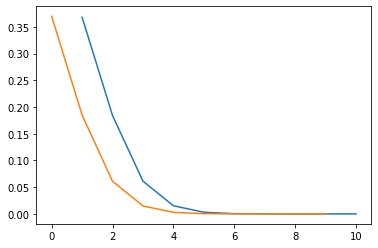

In [135]:
#10.generalization
poris=[]
bino=[]
N=100
for k in range(1,11):
    a10=1/math.e/math.factorial(k)
    b10=nCr(N,k)*math.pow(0.01,k)*math.pow(0.99,N-k)
    poris.append(a10)
    bino.append(b10)
k=np.linspace(1,10,10)
poris=np.transpose(poris).reshape(10,1)
bino=np.transpose(bino).reshape(10,1)
df=pd.DataFrame(poris,columns=['poris'],index=['k=1','k=2','k=3','k=4','k=5','k=6',
                                              'k=7','k=8','k=9','k=10'])
df['bino']=bino
df['diff%']=(poris-bino)/poris*100
plt.plot(k,poris,bino)
print('{}'.format(df),'\n\nSo we can use bin(100,0.01) to approximate Poxis(1) ')

In [28]:
#11.normal distribution
# assume u=1, sigma=0.1
u=1
σ=0.1
sample_n=10000
count1=count2=count3=1
s11=np.random.normal(u,sigma,100)
for i in s11:
    if i>u+σ:
        count1+=1
    if i>u+2*σ:
        count2+=1
    if i>u+3*σ:
        count3+=1
print('P(X>u+σ)=',count1/sample_n,'\nP(X>u+2σ)=',count2/sample_n,
     '\nP(X>u+3σ)=',count3/sample_n)

P(X>u+σ)= 0.0015 
P(X>u+2σ)= 0.0004 
P(X>u+3σ)= 0.0001


In [20]:
#12.varification
import math
# for geo: assume p=0.25, so the expectation is 4, and varience is 12
p=0.25
N=100
k=np.arange(1,N+1,1)
E_geo=V_geo=0
geo=np.arange(1,N+1,1.0)
for i in k-1:    
    geo[i]=math.pow(1-p,i)*p
    
for i in range(1,N+1):
    E_geo+=geo[i-1]*i
    V_geo+=geo[i-1]*i*i

print('Expectation of geomectric distribution:',E_geo,
      '\nVarience of geomectric distribution:',V_geo-math.pow(E_geo,2),
     )

 #for exp: assume numda=0.25, so the expectation is 4, and varience is 16
v12=0.25
right=100
N2=10000
E_exp=0
V_exp=0
# calculate the integral of x^2f(x) as E(X^2)
k1=w121=np.linspace(0,right,N2)
for i in range(1,N2+1):
    w121[i-1]=v12*math.exp(-v12*k1[i-1])*k1[i-1]*k1[i-1]

for i in range(1,N2+1):
    V_exp+=(right-0)/(N2+1)*w121[i-1]
# calculate the integral of xf(x) as E(X)
k2=ea=np.linspace(0,right,N2)
for i in range(1,N2+1):
    ea[i-1]=v12*math.exp(-v12*k2[i-1])*k2[i-1]
for i in range(1,N2+1):
    E_exp+=(right-0)/(N2+1)*ea[i-1]
# caculus the varience by using E(X^2)-(E(X))^2
print('Expectation of exponential distribution:',E_exp,
      '\nVarience of exponential distribution:',V_exp-E_exp,
     )

Expectation of geomectric distribution: 3.999999999966646 
Varience of geomectric distribution: 11.999999996794088
Expectation of exponential distribution: 3.9991979952169747 
Varience of exponential distribution: 27.99440249448325
